In [1]:
import pandas

In [2]:
import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':20, 
                            'xtick.labelsize':20, 
                            'ytick.labelsize':20, 
                            'axes.labelsize':20, 
                            'figure.figsize':(12 * 0.6, 9 * 0.6)})

# user-defined variables

In [3]:
target_genes = ['SREBF1', 'SREBF2', 'INSIG1', 'INSIG2', 'SCAP']

# read data

In [4]:
df = pandas.read_excel('/Users/adrian/scratch/supplemetary_information_table_SIT1.expression.xlsx', skiprows=3)
df.head()

,ENSEMBL ID,Gene name,Gene biotype,RSS_HLMV_28,RSS_HLMV_29,RSS_HLMV_30,RSS_HLMV_31,RSS_HLMV_32,RSS_HLMV_33,RSS_HLMV_34,...,RSS_HLMV_45,RSS_HLMV_46,RSS_HLMV_47,RSS_HLMV_48,RSS_HLMV_49,RSS_HLMV_50,RSS_HLMV_51,RSS_HLMV_52,RSS_HLMV_53,RSS_HLMV_54
0,ENSG00000000003,TSPAN6,protein_coding,38.526890,35.309339,39.840736,41.951376,38.061629,38.565773,38.346359,...,35.204046,36.511499,29.939159,31.072017,40.662226,36.395800,24.905552,35.040346,30.920235,37.974110
1,ENSG00000000005,TNMD,protein_coding,0.000000,0.000000,0.000000,0.278312,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.177716,0.059379,0.000000,0.000000,0.000000,0.116122,0.015197,0.000000
2,ENSG00000000419,DPM1,protein_coding,69.415227,49.131680,66.184838,92.956950,88.650591,85.447069,127.356106,...,113.265541,106.959497,99.429725,85.549739,102.582479,100.516519,84.135830,95.060423,96.772840,107.100754
3,ENSG00000000457,SCYL3,protein_coding,3.331287,2.858376,3.504064,5.829721,5.274378,4.404222,3.822031,...,3.444193,3.965564,3.876106,3.360422,4.843100,4.291843,2.957526,4.852541,3.489343,3.486497
4,ENSG00000000460,C1orf112,protein_coding,2.744336,3.172060,3.679316,4.587781,3.403177,3.809046,3.916106,...,3.024118,3.693697,2.545423,2.743481,3.342448,3.326444,3.072015,3.377629,2.217106,3.247478


# plot

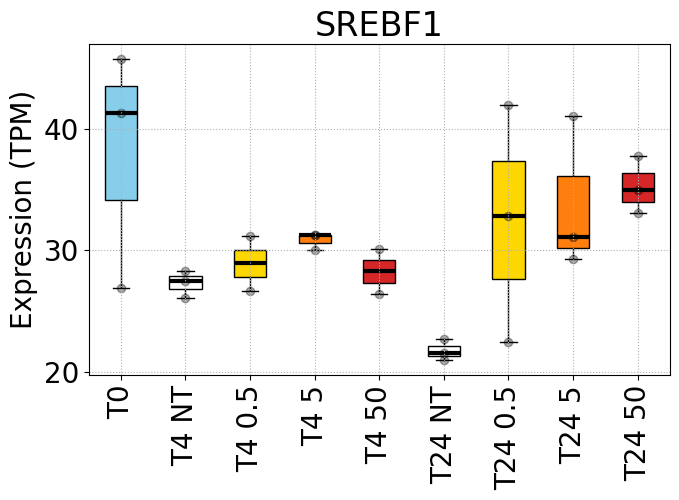

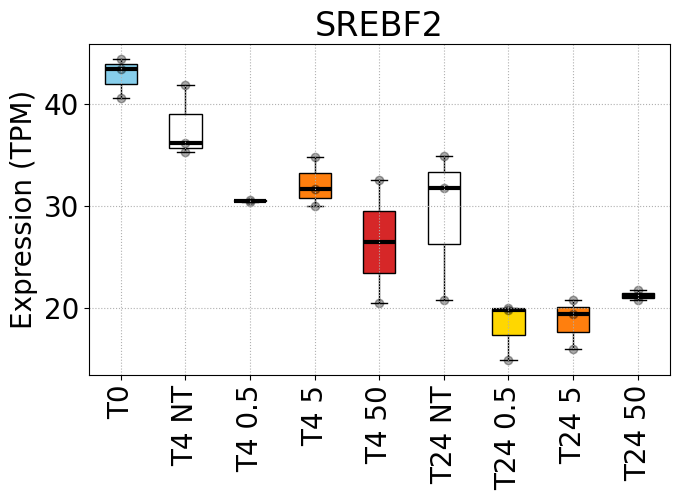

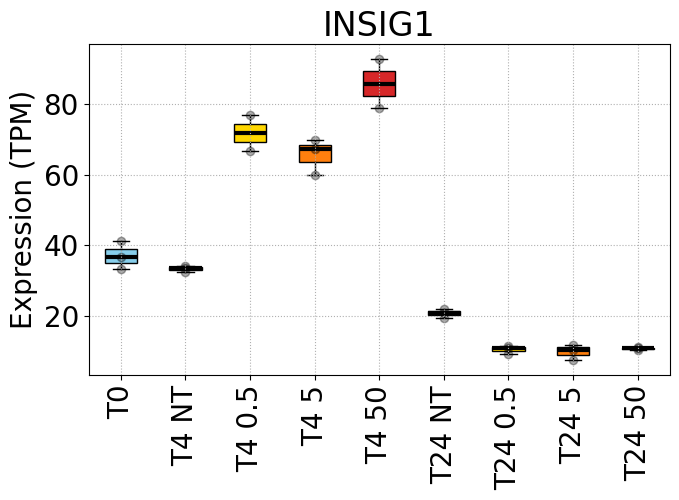

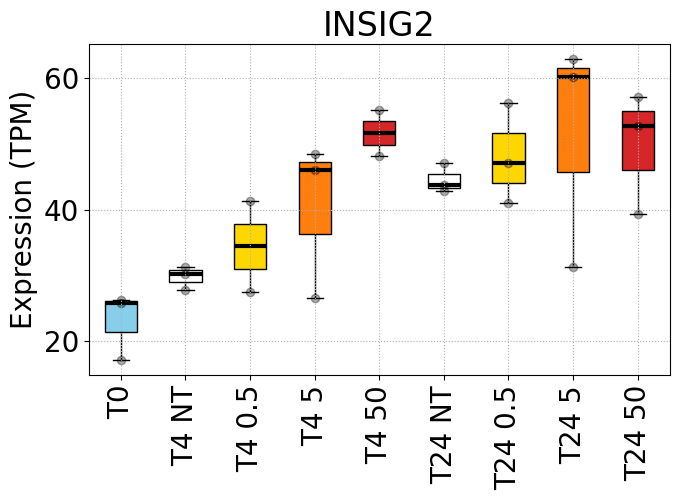

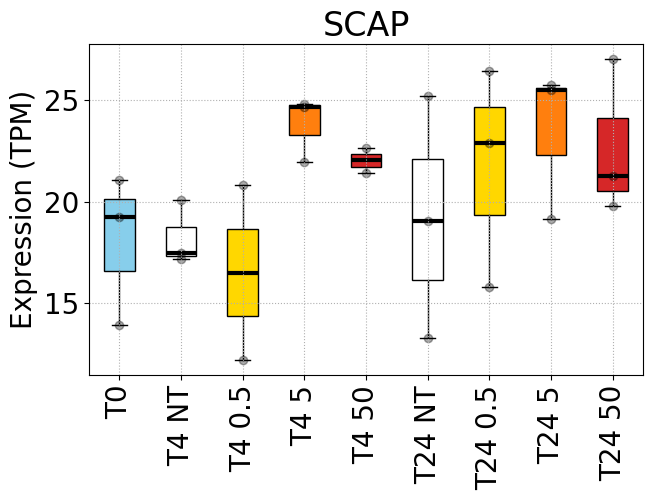

In [5]:
colors = ['skyblue', 'white', 'gold', 'tab:orange', 'tab:red', 'white', 'gold', 'tab:orange', 'tab:red']

for target_gene in target_genes:

    #
    hit = df.loc[df['Gene name'] == target_gene, :]

    #
    t0 = hit.iloc[0, 3:6]
    t4nt = hit.iloc[0, 6:9]
    t4half = hit.iloc[0, 9:11]
    t4five = hit.iloc[0, 11:14]
    t4fifty = hit.iloc[0, 14:16]

    t24nt = hit.iloc[0, 16:19]
    t24half = hit.iloc[0, 19:22]
    t24five = hit.iloc[0, 22:25]
    t24fifty = hit.iloc[0, 25:28]
    
    data = [t0, t4nt, t4half, t4five, t4fifty, t24nt, t24half, t24five, t24fifty]

    #
    boxes = matplotlib.pyplot.boxplot(data, patch_artist=True, zorder=1)
    for i in range(len(boxes['boxes'])):
        boxes['boxes'][i].set(facecolor=colors[i])
        boxes['medians'][i].set(color='black', lw=3)

    #
    x = []; y = []
    for i in range(len(data)):
        for element in data[i]:
            x.append(i+1)
            y.append(element)
    matplotlib.pyplot.scatter(x, y, color='black', alpha=1/3)
    
    matplotlib.pyplot.ylabel('Expression (TPM)')
    matplotlib.pyplot.xticks([1, 2, 3, 4, 5, 6, 7, 8, 9], ['T0', 'T4 NT', 'T4 0.5', 'T4 5', 'T4 50', 'T24 NT', 'T24 0.5', 'T24 5', 'T24 50'], rotation=90)
    matplotlib.pyplot.title(target_gene)
    
    matplotlib.pyplot.grid(ls=':')
    matplotlib.pyplot.tight_layout()
    matplotlib.pyplot.show()